# Linear system with one control input

## Step 1

Consider the following to a second order ODE:

$$
\dot x = 
\begin{pmatrix} 
1 & 0 \\ -5 & -10
\end{pmatrix}
x 
$$

The eigenvalues are $\lambda_1 = -10$ and $\lambda_1 = 1$, so unstable. 

## Step 2

Now let's consider the same system, but with control input:

$$
\dot x = 
\begin{pmatrix} 
1 & 0 \\ -5 & -10
\end{pmatrix}
x 
+
\begin{pmatrix} 
1 \\ 0
\end{pmatrix}
u
$$

Let us chose that $u = -2x_1$, in other words:

$$
u = 
\begin{pmatrix} 
-2 & 0
\end{pmatrix}
x
$$

Then we can re-write this as:

$$
\dot x = 
\begin{pmatrix} 
1 & 0 \\ -5 & -10
\end{pmatrix}
x 
+
\begin{pmatrix} 
1 \\ 0
\end{pmatrix}
\begin{pmatrix} 
-2 & 0
\end{pmatrix}
x
$$

$$
\dot x = 
\begin{pmatrix} 
1 & 0 \\ -5 & -10
\end{pmatrix}
x 
+
\begin{pmatrix} 
-2 & 0 \\ 0 & 0
\end{pmatrix}
x
$$


$$
\dot x = 
\begin{pmatrix} 
-1 & 0 \\ -5 & -10
\end{pmatrix}
x
$$

Now the eigenvalues are $\lambda_1 = -10$ and $\lambda_1 = -1$, so stable. 

In [ ]:

import numpy as np
from numpy.linalg import eig

A = np.array([[1, 0], [-5, -10]]) # state matrix
e, v = eig(A)
print("eigenvalues of A:", e)

A = np.array([[-1, 0], [-5, -10]]) # state matrix
e, v = eig(A)
print("eigenvalues of A:", e)

eigenvalues of A: [-10.   1.]
eigenvalues of A: [-10.  -1.]


# Pole placement

There is a technique for finding suitable $K$ matrix that would produced desired eigenvalues of the $A - BK$ system. It is called pole placement.

Watch the intoduction to pole placement for self-study: [link](https://www.youtube.com/watch?v=FXSpHy8LvmY&ab_channel=MATLAB). Notice the difference between the approach to "steady state" control design show there, and in the lecture.

In [ ]:
import numpy as np
from numpy.linalg import eig
from scipy.integrate import odeint
from scipy.signal import place_poles

n = 2
A = np.array([[1, 0], [-5, -10]])
B = np.array([[1], [0]])

# x_dot from state space
def StateSpace(x, t):
    return A.dot(x)# + B*np.sin(t)

time = np.linspace(0, 1, 1000)   
x0 = np.random.rand(n)  # initial state

solution = {"SS": odeint(StateSpace, x0, time)}

#desired eigenvalues
poles = np.array([-1, -2])
place_obj = place_poles(A, B, poles)

#found control gains
K = place_obj.gain_matrix;
print("K:", K)

#test that eigenvalues of the closed loop system are what they are supposed to be 
e, v = eig((A - B.dot(K)))
print("eigenvalues of A - B*K:", e)

K: [[ -6.  -14.4]]
eigenvalues of A - B*K: [-1. -2.]


In [ ]:
#desired eigenvalues
poles = np.array([-100, -200])
place_obj = place_poles(A, B, poles)

#found control gains
K = place_obj.gain_matrix;
print("K:", K)

#test that eigenvalues of the closed loop system are what they are supposed to be 
e, v = eig((A - B.dot(K)))
print("eigenvalues of A - B*K:", e)

#notice how different the gain matrix is!

K: [[  291. -3420.]]
eigenvalues of A - B*K: [-200. -100.]


## Task 1.1 Make the following systems stable, proposing appropriate control


$$\dot x = 
\begin{pmatrix} 10 & 0 \\ -5 & 10
\end{pmatrix}
x
+
\begin{pmatrix} 
2 \\ 0
\end{pmatrix}
u
$$


$$\dot x = 
\begin{pmatrix} 0 & -8 \\ 1 & 30
\end{pmatrix}
x
+
\begin{pmatrix} 
-2 \\ 1
\end{pmatrix}
u
$$


$$\dot x = 
\begin{pmatrix} 2 & 2 \\ -6 & 10
\end{pmatrix}
x
+
\begin{pmatrix} 
0 \\ 5
\end{pmatrix}
u
$$


$$\dot x = 
\begin{pmatrix} 5 & -5 \\ 6 & 15
\end{pmatrix}
x
+
\begin{pmatrix} 
-10 \\ 10
\end{pmatrix}
u
$$

In [2]:
#Code: 1.1.1
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig
from numpy.linalg import eigvals
from scipy.integrate import odeint
from scipy.signal import place_poles

def plot(x, y, ** kwargs):
  arr = []
  nparr = np.array([[]])
  gTitle = kwargs.pop('title','graph')
  if type(y) == type(arr):
    if type(x) != type(arr):
      for e in y:
        if type(e) == type(nparr):
          plt.plot(x, e)
    elif type(x) == type(arr) and len(x) == len(y):
      for i in range(len(x)):
        plt.plot(x[i], y[i])
    else:
      raise NameError('invalid x, y input')
  elif type(y) == type(nparr):
    plt.plot(x, y)
  plt.title(gTitle)
  plt.xlabel(kwargs.pop("xlable", "X"))
  plt.ylabel(kwargs.pop("ylable", "F(x)"))
  plt.show()
# x_dot from state space
def StateSpace(x, t, A, B, K):
    return A.dot(x) - B.dot(K).dot(x)

n = 2

A = []
A += [np.array([[10, 0], [-5, 10]])]
A += [np.array([[0, -8], [1, 30]])]
A += [np.array([[2, 2], [-6, 10]])]
A += [np.array([[5, -5], [6, 15]])]
B =[]
B += [[np.array([[2  ], [0]])  , np.array([[2, 1], [0, -1]])]]
B += [[np.array([[-2 ], [1]])  , np.array([[-2, 1], [1, 1]])]]
B += [[np.array([[0  ], [5]])   , np.array([[0, -1], [5, -1]])]]
B += [[np.array([[-10], [10]]), np.array([[-10, 3], [10, 3]])]]

time = np.linspace(0, 2, 1000)   
x0 = np.random.rand(n)  # initial state

K0: [[ 16. -24.]]
K1: [[ 2. 46.]]
K2: [[3.6 4.8]]
K3: [[-26.7 -23.5]]
e0 [-10.  -2.]
e1 [ -2. -10.]
e2 [ -2. -10.]
e3 [-10.  -2.]


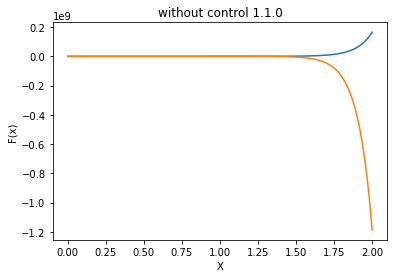

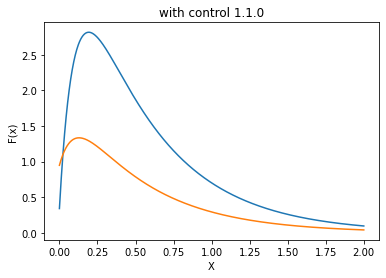

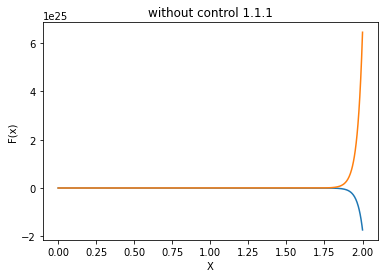

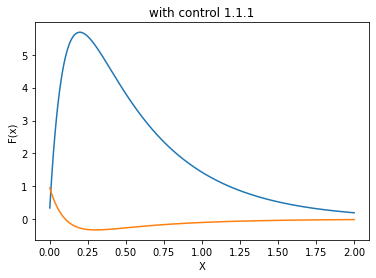

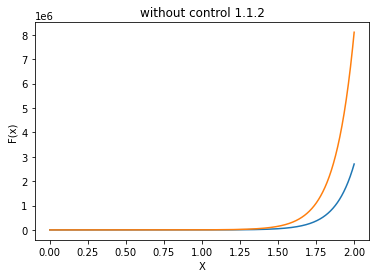

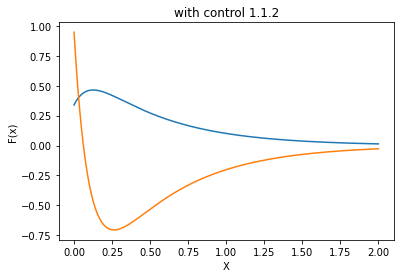

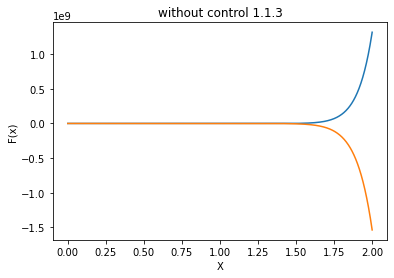

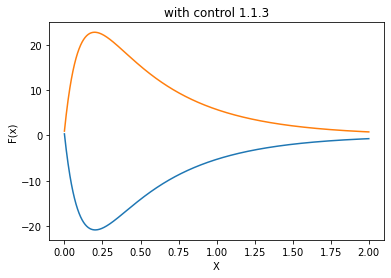

In [ ]:
#Code 1.1.2 (required 1.1.1)
k0 = np.array([[0, 0]])
solution = []
for i in range(len(A)):
  solution += [odeint(StateSpace, x0, time, args=(A[i], B[i][0], k0))]


#desired eigenvalues
poles = np.array([-10, -2])
place_obj = []
for i in range(len(A)):
  place_obj += [place_poles(A[i], B[i][0], poles)]

#found control gains
K = []
for obj in place_obj:
  K += [obj.gain_matrix]
for i in range(len(K)):
  print("K%(i)s:" % locals(), K[i])
#test that eigenvalues of the closed loop system are what they are supposed to be 
for i in range(len(A)):
  print("e%(i)s" % locals(), eigvals((A[i] - B[i][0].dot(K[i]))))
newSolution = []
for i in range(len(A)):
  newSolution += [odeint(StateSpace, x0, time, args=(A[i], B[i][0], K[i]))]

for i in range(len(solution)):
  plot(time, solution[i], title="without control 1.1.%(i)s" % locals())
  plot(time,newSolution[i], title="with control 1.1.%(i)s" % locals())

## Task 1.2 Make the following systems stable, proposing appropriate control

$$\dot x = 
\begin{pmatrix} 10 & 0 \\ -5 & 10
\end{pmatrix}
x
+
\begin{pmatrix} 
2 & 1 \\ 0 & -1
\end{pmatrix}
u
$$


$$\dot x = 
\begin{pmatrix} 0 & -8 \\ 1 & 30
\end{pmatrix}
x
+
\begin{pmatrix} 
-2 & 1 \\ 1 & 1
\end{pmatrix}
u
$$


$$\dot x = 
\begin{pmatrix} 2 & 2 \\ -6 & 10
\end{pmatrix}
x
+
\begin{pmatrix} 
0 & -1 \\ 5 & -1
\end{pmatrix}
u
$$


$$\dot x = 
\begin{pmatrix} 5 & -5 \\ 6 & 15
\end{pmatrix}
x
+
\begin{pmatrix} 
-10 & 3 \\ 10 & 3
\end{pmatrix}
u
$$

K0: [[  3.5   5.5]
 [  5.  -11. ]]
K1: [[-0.33333333 13.        ]
 [ 1.33333333 18.        ]]
K2: [[-2.   1.8]
 [-4.  -2. ]]
K3: [[-0.05        1.05      ]
 [ 2.16666667  1.83333333]]
e0 [-1. -2.]
e1 [-2. -1.]
e2 [-2. -1.]
e3 [-2. -1.]

B[i][1].dot(K[i])

[[12.  0.]
 [-5. 11.]]

[[ 2. -8.]
 [ 1. 31.]]

[[ 4.  2.]
 [-6. 11.]]

[[ 7. -5.]
 [ 6. 16.]]


A[i] - B[i][1].dot(K[i])

[[-2.0000000e+00  0.0000000e+00]
 [-8.8817842e-16 -1.0000000e+00]]

[[-2.0000000e+00 -1.0658141e-14]
 [ 0.0000000e+00 -1.0000000e+00]]

[[-2.0000000e+00 -8.8817842e-16]
 [ 8.8817842e-16 -1.0000000e+00]]

[[-2.00000000e+00 -2.66453526e-15]
 [ 0.00000000e+00 -1.00000000e+00]]


(A[i] - B[i][1].dot(K[i])).dot(x0)

[-0.67866333 -0.94735496]

[-0.67866333 -0.94735496]

[-0.67866333 -0.94735496]

[-0.67866333 -0.94735496]


As we can see here after operation "(A[i] - B[i][1].dot(K[i])).dot(x0)" we get absolutely identical initial values of x_dot.
And since all functions have same eigvals all graphs with control looks in

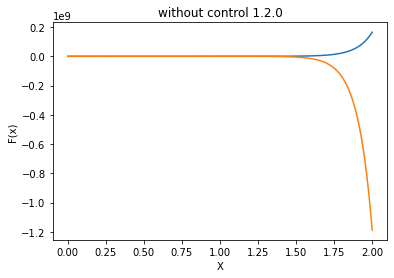

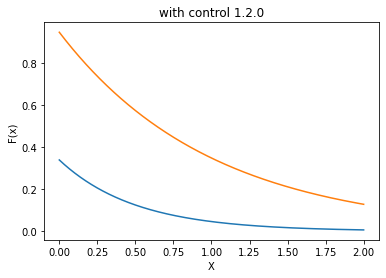

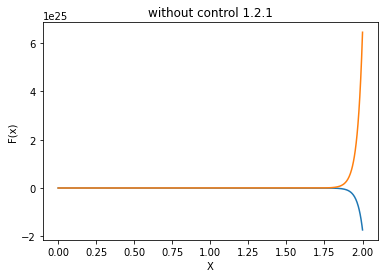

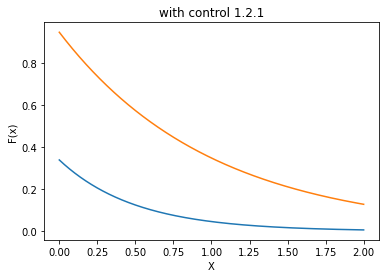

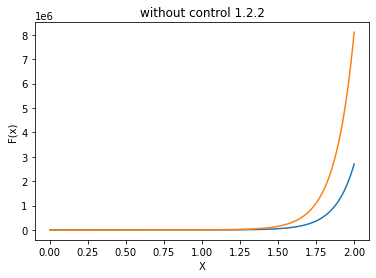

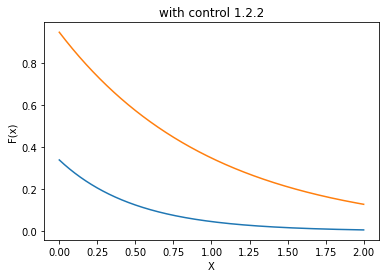

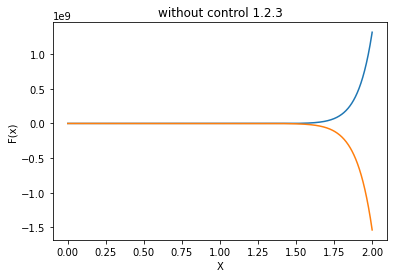

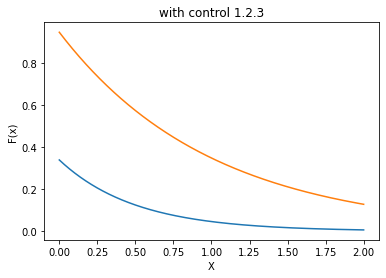

In [ ]:
#Code 1.1.2 (required 1.1.1)
k0 = np.array([[0, 0], [0, 0]])
solution = []
for i in range(len(A)):
  solution += [odeint(StateSpace, x0, time, args=(A[i], B[i][1], k0))]


#desired eigenvalues
poles = np.array([-1, -2])
place_obj = []
for i in range(len(A)):
  place_obj += [place_poles(A[i], B[i][1], poles)]
#found control gains
K = []
for obj in place_obj:
  K += [obj.gain_matrix]
for i in range(len(K)):
  print("K%(i)s:" % locals(), K[i])
#test that eigenvalues of the closed loop system are what they are supposed to be 
for i in range(len(A)):
  print("e%(i)s" % locals(), eigvals((A[i] - B[i][1].dot(K[i]))))
newSolution = []
for i in range(len(A)):
  newSolution += [odeint(StateSpace, x0, time, args=(A[i], B[i][1], K[i]))]

print("\nB[i][1].dot(K[i])\n")
for i in range(len(K)):
  print(B[i][1].dot(K[i]), end="\n\n")
print("\nA[i] - B[i][1].dot(K[i])\n")
for i in range(len(K)):
  print(A[i] - B[i][1].dot(K[i]), end="\n\n")
print("\n(A[i] - B[i][1].dot(K[i])).dot(x0)\n")
for i in range(len(K)):
  print((A[i] - B[i][1].dot(K[i])).dot(x0), end="\n\n")
print("\nAs we can see here after operation \"(A[i] - B[i][1].dot(K[i])).dot(x0)"+
      "\" we get absolutely identical initial values of x_dot.\n"+
      "And since all functions have same eigvals all graphs with control"+
      " looks in the same way despite that fact that \nit is definitely different systems.\n")

for i in range(len(solution)):
  plot(time, solution[i], title="without control 1.2.%(i)s" % locals())
  plot(time,newSolution[i], title="with control 1.2.%(i)s" % locals())


## Task 1.3 Give example of an unstable system that can't be stabilized...

of the form $\dot x = 
Ax+Bu$, where $A \in \mathbb{R}^{2 \times 2}$

* where $B \in \mathbb{R}^{2 \times 1}$
* where $B \in \mathbb{R}^{2 \times 2}$
* where $B \in \mathbb{R}^{2 \times 3}$

##Ans 1.3:
In all cases system cannot be stabilized if we cannot affect the system (B = 0). Also in systems where our controllability not powerfull enough, as a result we cannot stabilaze system for example:
$$
A = \begin{pmatrix} 10  & 0 \\ 0 & 15\end{pmatrix},
B = \begin{pmatrix} 10 \\ 0
\end{pmatrix}
$$
$$
A = \begin{pmatrix} 10  & 0 \\ 0 & 15\end{pmatrix},
B = \begin{pmatrix} 10 & 0 \\ 0 & 0
\end{pmatrix}
$$
$$
A = \begin{pmatrix} 10  & 0 \\ 0 & 15\end{pmatrix},
B = \begin{pmatrix} 10 & 0 & 0 \\ 0 & 0 & 0
\end{pmatrix}
$$
In these systems no matter which K was selected, we cannot set both egivals to be less then 0

# Root locus

Consider the following question: given system $\dot x = Ax+Bu$ and control $u = 
-Kx$, how does the change in $K$ changes the eigenvalues of theresulting matrix $(A - BK)$?

Root locus method is drawing the graph of eigenvalues of the matrix $(A - BK)$ for a given change of matrix $K$. We only vary a single component of $K$, so the result is a line.

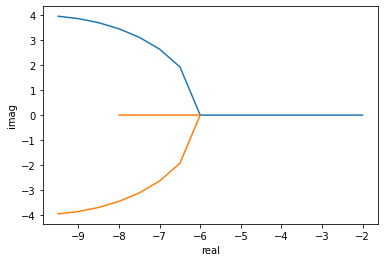

In [ ]:
import matplotlib.pyplot as plt

A = np.array([[1, -7], [2, -10]])
B = np.array([[1], [0]])
K0 = np.array([[1, 1]]);

k_min = 1;
k_max = 10;
k_step = 0.1;

Count = np.floor((k_max-k_min)/k_step)
Count = Count.astype(int)

k_range = np.linspace(k_min, k_max, Count)

E = np.zeros((Count, 4))

for i in range(Count):
    K0[0, 0] = k_range[i]

    ei, v = eig((A - B.dot(K0)))

    E[i, 0] = np.real(ei[0])
    E[i, 1] = np.imag(ei[0])
    E[i, 2] = np.real(ei[1])
    E[i, 3] = np.imag(ei[1])

    #print("eigenvalues of A - B*K:", ei)


plt.plot(E[:, 0], E[:, 1])
plt.plot(E[:, 2], E[:, 3])
plt.xlabel('real')
plt.ylabel('imag')
plt.show()


## Task 2.1 Plot root locus

* For a system with $A$ with imaginary eigenvalues
* For a system with $A$ with real eigenvalues
* For a system where real parts of eigenvalues of $(A - BK)$ are all positive
* For a system where real parts of eigenvalues of $(A - BK)$ are all negative

In [ ]:
#Code 2.1.1 (required 1.1.1,)
#matrix generating 
A = []
B = []
K = []

k_min = -50;
k_max = 50;
k_step = 0.1;

Count = np.floor((k_max-k_min)/k_step)
Count = Count.astype(int)

k_range = np.linspace(k_min, k_max, Count)

def genMatrix(x, y):
  temp = np.random.rand(x, y)
  for i in range(len(temp)):
    for j in range(len(temp[0])):
      temp[i][j] *= np.random.randint(-50, 50)
      temp[i][j] = int(temp[i][j])
  return temp

while 1:
  temp = genMatrix(2, 2)
  e = eigvals(temp)
  if(e.imag == 0).all():
    A += [temp]
    break
B += [genMatrix(2, 1)]
K += [genMatrix(1, 2)]

while 1:
  temp = genMatrix(2, 2)
  e = eigvals(temp)
  if(e.imag != 0).all():
    A += [temp]
    break
B += [genMatrix(2, 1)]
K += [genMatrix(1, 2)]

while 1:
  tempA = genMatrix(2, 2)
  tempB = genMatrix(2, 1)
  tempK = genMatrix(1, 2)
  E = np.zeros((Count, 2))
  for j in range(Count):
      tempK[0, 0] = k_range[j]
      e = eigvals(tempA - tempB.dot(tempK))
      E[j, 0] = np.real(e[0])
      E[j, 1] = np.real(e[1])
  if(E > 0).all():
    A += [tempA]
    B += [tempB]
    K += [tempK]
    break
while 1:
  tempA = genMatrix(2, 2)
  tempB = genMatrix(2, 1)
  tempK = genMatrix(1, 2)
  E = np.zeros((Count, 2))
  for j in range(Count):
      tempK[0, 0] = k_range[j]
      e = eigvals(tempA - tempB.dot(tempK))
      E[j, 0] = np.real(e[0])
      E[j, 1] = np.real(e[1])
  if(E < 0).all():
    A += [tempA]
    B += [tempB]
    K += [tempK]
    break

for i in range(len(A)):
  print("A[%(i)s]:\n" % locals(), A[i])
  print("B[%(i)s]:\n" % locals(), B[i])
  print("K[%(i)s]:\n" % locals(), K[i])
  if i < 2:
    print("eigvals A[%(i)s]:\n" % locals(), eigvals(A[i]))
  else:
    print("eigvals (A[%(i)s] - B[%(i)s]K[%(i)s]):\n" % locals(), eigvals(A[i] - B[i].dot(K[i])))
  print()




A[0]:
 [[-20.  -1.]
 [ -4.   0.]]
B[0]:
 [[-23.]
 [ 27.]]
K[0]:
 [[-3. 15.]]
eigvals A[0]:
 [-20.19803903   0.19803903]

A[1]:
 [[-6. -8.]
 [24.  2.]]
B[1]:
 [[  4.]
 [-15.]]
K[1]:
 [[ 4. -9.]]
eigvals A[1]:
 [-2.+13.26649916j -2.-13.26649916j]

A[2]:
 [[26.  2.]
 [-1. 12.]]
B[2]:
 [[ 1.]
 [14.]]
K[2]:
 [[50. -9.]]
eigvals (A[2] - B[2]K[2]):
 [57.+33.91164992j 57.-33.91164992j]

A[3]:
 [[-43. -12.]
 [ 22.   4.]]
B[3]:
 [[ -7.]
 [-27.]]
K[3]:
 [[ 50. -22.]]
eigvals (A[3] - B[3]K[3]):
 [-141.5+163.09429788j -141.5-163.09429788j]



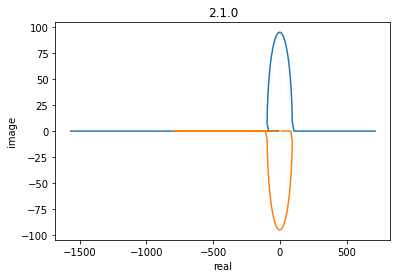

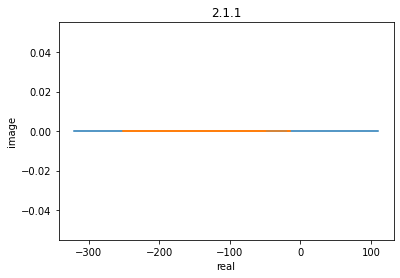

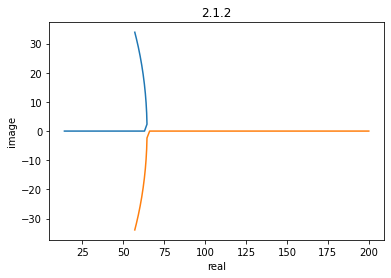

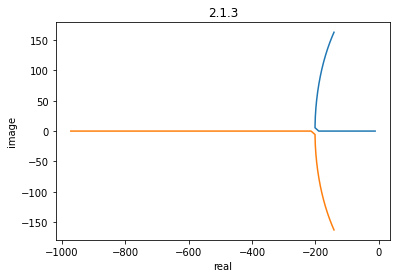

In [ ]:
#Code: 2.1.2 (required 1.1.1, required 2.1.1)
#If there is almost nothing on graphs try to generate matrixes one more time
#(execute 2.1.1 block)
E = []
for i in range(len(K)):
  E += [np.zeros((Count, 4))]
for i in range(len(K)):
  for j in range(Count):
      K[i][0, 0] = k_range[j]
      ei, v = eig((A[i] - B[i].dot(K[i])))

      E[i][j, 0] = np.real(ei[0])
      E[i][j, 1] = np.imag(ei[0])
      E[i][j, 2] = np.real(ei[1])
      E[i][j, 3] = np.imag(ei[1])

    #print("eigenvalues of A - B*K:", ei)


for i in range(len(E)):
  plot([E[i][:, 0], E[i][:, 2]], [E[i][:, 1], E[i][:, 3]], title="2.1.%(i)s" % 
       locals(), xlable="real", ylable="image")


# Reaction to inputs

## Task 3 Step functions

### Task 3.1 Simulate one of the given systems with a step function as an imput.

### Task 3.2 Linear combination of solutions

Simulate one of the given systems with two different step functions $f_1$,  $f_2$ as an imput, and as a sum of those $f_1+f_2$ as an imput. Compare the sum of the solutions for the $f_1$,  $f_2$ with the solution for $f_1+f_2$.

$$ f_1 = 
\begin{cases} 
1, \ \ \ t \geq t_1 \\
0, \ \ \ t < t_1
\end{cases} 
$$
$$ f_2 = 
\begin{cases} 
1, \ \ \ t \geq t_2 \\
0, \ \ \ t < t_2
\end{cases} 
$$

u(0) - original graph
u(1) - f1
u(2) - f2
u(3) - f1 + f2


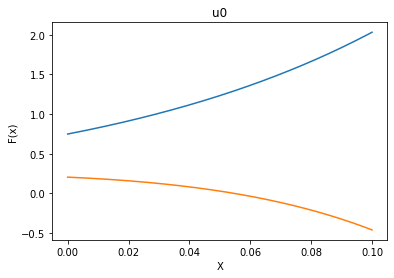

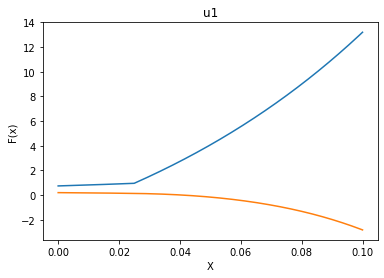

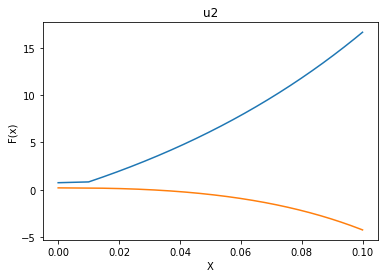

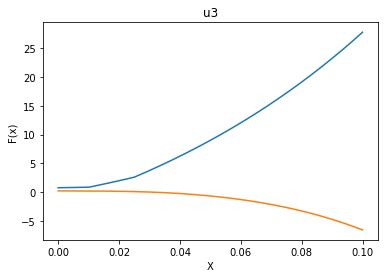

In [ ]:
#Code 3.1.1 & 3.2 (required 1.1.1)
from scipy import signal

t1, t2 = 0.025 , 0.01

def f0(t): #without step function
  return 0
def f1(t): #step function 1
    return 50 if t>=t1 else 0 
    # increase step function value in order to show changes better
def f2(t): #step function 2
  return 50 if t>=t2 else 0
  # increase step function value in order to show changes better

A = np.array([[10., 0.], [-5., 10.]])
B = np.array([[2.], [0.]])
C = np.eye(2);
D = np.zeros(shape=(2,1))

x0 = np.random.rand(2)
time = np.linspace(0, 0.1, 1000)

u = []
u += [np.array(list(map(f0, time)))]
u += [np.array(list(map(f1, time)))]
u += [np.array(list(map(f2, time)))]
u += [u[1] + u[2]]
system = signal.StateSpace(A, B, C, D)
x = []
for el in u:
  x += [signal.lsim(system, el, time, X0=x0)]

print("u(0) - original graph\nu(1) - f1\nu(2) - f2\nu(3) - f1 + f2")

for i in range(len(x)):
  plot(time, x[i][1], title="u%(i)s" %locals())


## Task 4 Sinusoidal inputs

Simulate one of the prevuiously given function for a sinusoidal input $u = sin(wt)$.

How does the choice of $w$ affects the result?

(not graded):
Watch [video](https://youtu.be/bU7y051Ejgw) on "frequency responce" and find how you could use the proposed method to analyse the effect of $w$ in your problem.

Now, let us see how to plot ferquency responce in a plot, via scipy library:

num: [[ 0.  1. 10.]
 [ 0.  0.  2.]]
den: [1. 9. 4.]


Text(0.5, 0, 'Frequency [rad/sample]')

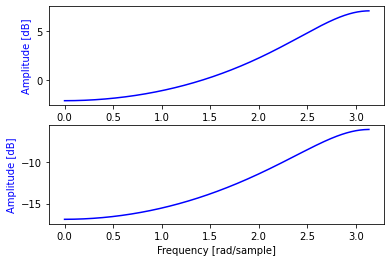

In [ ]:
from scipy.signal import ss2tf
from scipy.signal import freqz


A = np.array([[1, -7], [2, -10]])
B = np.array([[1], [0]])
C = np.eye(2)
D = np.zeros((2, 1))

num, den = ss2tf(A, B, C, D)

print("num:", num)
print("den:", den)

w1, h1 = freqz(num[0, :], den)
w2, h2 = freqz(num[1, :], den)

plt.subplot(211)
plt.plot(w1, 20 * np.log10(abs(h1)), 'b')
plt.ylabel('Amplitude [dB]', color='b')
plt.xlabel('Frequency [rad/sample]')

plt.subplot(212)
plt.plot(w2, 20 * np.log10(abs(h2)), 'b')
plt.ylabel('Amplitude [dB]', color='b')
plt.xlabel('Frequency [rad/sample]')

## Task 4.1 Make frequency diagrams for 2 of the systems you studied in the tasks 1.1 and 1.2

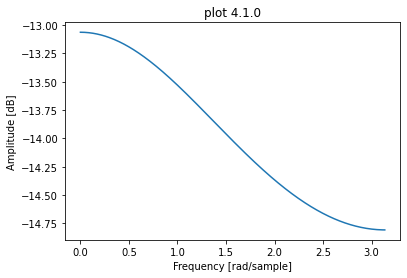

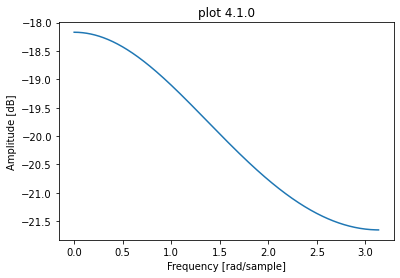

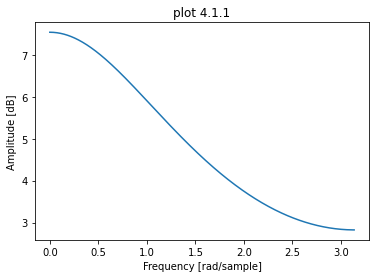

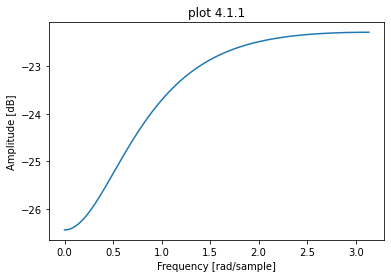

In [ ]:
#Code 4.1 (required 1.1.1)
from scipy.signal import ss2tf
from scipy.signal import freqz


A = []
A += [np.array([[10, 0], [-5, 10]])]
A += [np.array([[0, -8], [1, 30]])]
B =[]
B += [np.array([[2  ], [0]])]
B += [np.array([[-2 ], [1]])]

C = np.eye(2)
D = np.zeros((2, 1))

tf = []
for i in range(len(A)): 
  tf += [ss2tf(A[i], B[i], C, D)]

freq1 = []
freq2 = []
for a in tf:
  freq1 += [freqz(a[0][0, :], a[1])]
  freq2 += [freqz(a[0][1, :], a[1])]

for i in range(len(freq1)):
  plot(freq1[i][0], 20*np.log10(abs(freq1[i][1])), title="plot 4.1.%(i)s" %locals(), 
       xlable="Frequency [rad/sample]", ylable="Amplitude [dB]")
  plot(freq2[i][0], 20*np.log10(abs(freq2[i][1])), title="plot 4.1.%(i)s" %locals(), 
       xlable="Frequency [rad/sample]", ylable="Amplitude [dB]")

# 5. Point-to-point control

Given system:

$$\dot x = 
\begin{pmatrix} 10 & 5 \\ -5 & -10
\end{pmatrix}
x
+
\begin{pmatrix} 
-1 \\ 2
\end{pmatrix}
u
$$

let us drive it towards the point $x^* = \begin{pmatrix} 0 \\ 1 \end{pmatrix}$

We define our control as:

$$u = 
-K (x - x^*) + u^*
$$

## Step 1 - Feed-forward design

We know that $\dot x^* = 0$ and that at the node our dynamics obtains the form:

$$0 = 
\begin{pmatrix} 10 & 5 \\ -5 & -10
\end{pmatrix}
\begin{pmatrix} 0 \\ 1 \end{pmatrix}
+
\begin{pmatrix} 
-1 \\ 2
\end{pmatrix}
u^*
$$

In other words, $u^* = 5$.

## Step 2

We define control error as $e = x - x^*$. 


Now we write error dynamics:

$$\dot x - \dot x^* = 
\begin{pmatrix} 10 & 5 \\ -5 & -10
\end{pmatrix}
x
 - 
\begin{pmatrix} 10 & 5 \\ -5 & -10
\end{pmatrix}
x^*
+
\begin{pmatrix} 
-1 \\ 2
\end{pmatrix}
(-K (x - x^*) + u^*)
-
\begin{pmatrix} 
-1 \\ 2
\end{pmatrix}
u^*
$$


$$\dot e = 
\begin{pmatrix} 10 & 5 \\ -5 & -10
\end{pmatrix}
e
-
\begin{pmatrix} 
-1 \\ 2
\end{pmatrix}
K e
$$


## Step 3 - feedback design

In [ ]:

A = np.array([[10, 5], [-5, -10]])
B = np.array([[-1], [2]])

#desired eigenvalues
poles = np.array([-1, -2])
place_obj = place_poles(A, B, poles)

#found control gains
K = place_obj.gain_matrix;
print("K:", K)

#test that eigenvalues of the closed loop system are what they are supposed to be 
e, v = eig((A - B.dot(K)))
print("eigenvalues of A - B*K:", e)

K: [[-13.26666667  -5.13333333]]
eigenvalues of A - B*K: [-2. -1.]


## Simulate forward wirth the found control

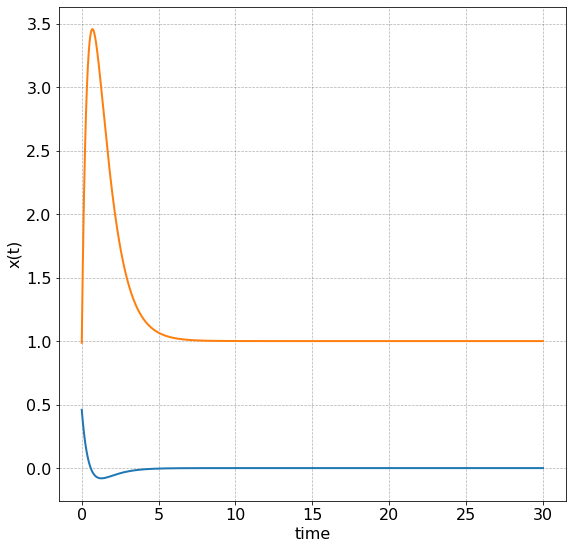

In [ ]:

x_desired = np.array([0, 1])
u_desired = np.array([5])


def StateSpace(x, t):
    u = -K.dot(x - x_desired) + u_desired
    return A.dot(x) + B.dot(u)

time = np.linspace(0, 30, 30000)   
x0 = np.random.rand(n)  # initial state

solution = {"solution_1": odeint(StateSpace, x0, time)}    


plt.rcParams['figure.figsize'] = [20, 20]

# plt.rcParams["font.family"] = "Old Times American"
plt.rcParams["font.size"] = 16
plt.rcParams["font.weight"] = 'normal'


# plt.subplot(221)
plt.plot(time, solution["solution_1"], linewidth=2)
plt.xlabel('time')
plt.ylabel('x(t)')
plt.grid(color='k', linestyle='--', linewidth=0.7, alpha=0.3)
# plt.title('autonomous')

## Task 5.1 Design point-to-point control and simulate two systems:

* where $B \in \mathbb{R}^{2 \times 1}$
* where $B \in \mathbb{R}^{2 \times 2}$

K0: [[ 16. -24.]]
K1: [[  7.5   6. ]
 [  5.  -12. ]]
e0 [-10.  -2.]
e0 [-10.  -2.]


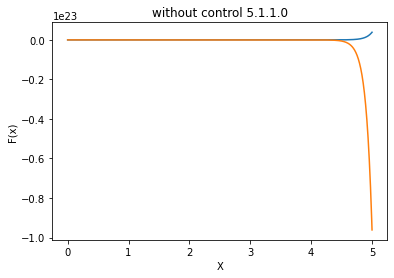

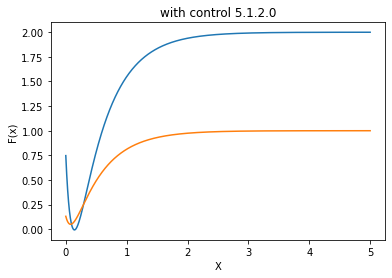

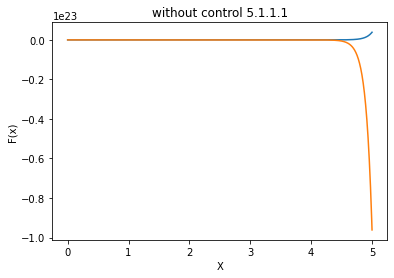

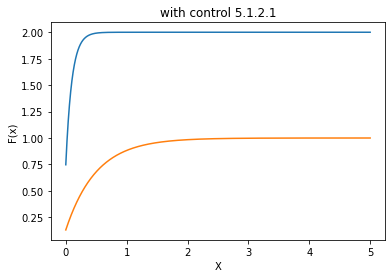

In [83]:
#Code 5.1.1 (required 1.1.1)

def StateSpace(x, t, A, B, K, x_d):
    
    u_d = - ((np.linalg.pinv(B)).dot(A.dot(x_d)))
    u = -K.dot(x - x_d) + u_d
    return A.dot(x) + B.dot(u)

A = []
A += [np.array([[10, 0], [-5, 10]])]
B =[]
B += [[np.array([[2], [0]])  , np.array([[2, 1], [0, -1]])]]

time = np.linspace(0, 5, 1000)   
x0 = np.random.rand(2)  # initial state
x_d0 = np.array([0, 0]) 
k0 = [np.array([[0, 0]]), np.array([[0, 0], [0, 0]])]
solution = []
for i in range(len(A)):
  solution += [odeint(StateSpace, x0, time, args=(A[i], B[i][0], k0[0], x_d0))]
  solution += [odeint(StateSpace, x0, time, args=(A[i], B[i][1], k0[1], x_d0))]

x_d = np.array([2, 1])
#desired eigenvalues
poles = np.array([-10, -2])
place_obj = []
for i in range(len(A)):
  place_obj += [place_poles(A[i], B[i][0], poles)]
  place_obj += [place_poles(A[i], B[i][1], poles)]

#found control gains
K = []
for obj in place_obj:
  K += [obj.gain_matrix]
for i in range(len(K)):
  print("K%(i)s:" % locals(), K[i])
#test that eigenvalues of the closed loop system are what they are supposed to be 
for i in range(len(A)):
  print("e%(i)s" % locals(), eigvals((A[i] - B[i][0].dot(K[i*2]))))
  print("e%(i)s" % locals(), eigvals((A[i] - B[i][1].dot(K[i*2 + 1]))))
newSolution = []
for i in range(len(A)):
  newSolution += [odeint(StateSpace, x0, time, args=(A[i], B[i][0], K[i*2], x_d))]
  newSolution += [odeint(StateSpace, x0, time, args=(A[i], B[i][1], K[i*2 + 1], x_d))]

for i in range(len(solution)):
  plot(time, solution[i], title="without control 5.1.1.%(i)s" % locals())
  plot(time,newSolution[i], title="with control 5.1.2.%(i)s" % locals())

# 6. Discrete systems

Let's consider discrete system: $x_{i+1} = Ax_i + Bu_i$

## Task 6.1

Find which of the followig systems is stable:

$$x_{i+1} = 
\begin{pmatrix} 0.5 & 0.1 \\ -0.05 & 0.2
\end{pmatrix}
x_i
$$


$$x_{i+1} = 
\begin{pmatrix} 1 & -2 \\ 0 & 0.3
\end{pmatrix}
x_i
$$


$$x_{i+1} = 
\begin{pmatrix} -5 & 0 \\ -0.1 & 1
\end{pmatrix}
x_i
+
\begin{pmatrix} 
0 \\ 0.5
\end{pmatrix}
u_i, \ \ \ 
u_i = 
\begin{pmatrix} 
0 & 0.2
\end{pmatrix}
x_i
$$


$$x_{i+1} = 
\begin{pmatrix} -2.2 & -3 \\ 0 & 0.5
\end{pmatrix}
x_i
+
\begin{pmatrix} 
-1 \\ 1
\end{pmatrix}
u_i, \ \ \ 
u_i = 10
$$


## Task 6.2

Propose control that makes the following systems stable:

$$x_{i+1} = 
\begin{pmatrix} 1 & 1 \\ -0.4 & 0.1
\end{pmatrix}
x_i
+
\begin{pmatrix} 
0.5 \\ 0.5
\end{pmatrix}
u_i
$$


$$x_{i+1} = 
\begin{pmatrix} 0.8 & -0.3 \\ 0 & 0.15
\end{pmatrix}
x_i
+
\begin{pmatrix} 
-1 \\ 1
\end{pmatrix}
u_i
$$

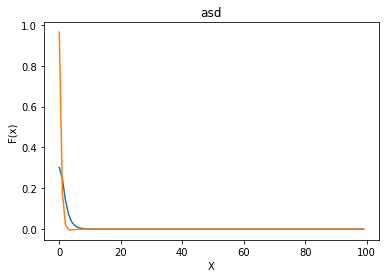

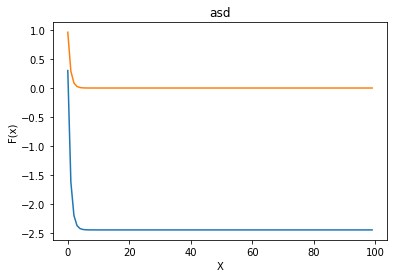

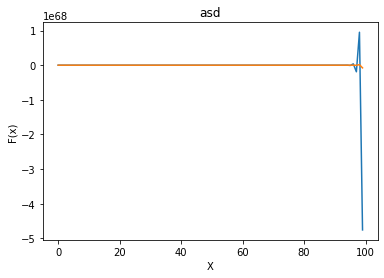

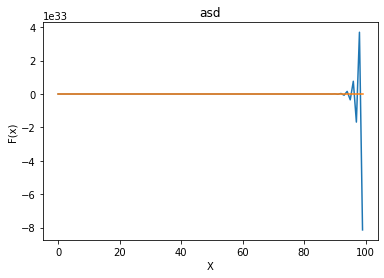

In [103]:
#Code 6.1 (required 1.1.1)

A = []
A += [np.array([[0.5 , 0.1],[-0.05, 0.2]])]
A += [np.array([[1   , -2 ],[ 0   , 0.3]])]
A += [np.array([[-5  , 0  ],[-0.1 , 1  ]])]
A += [np.array([[-2.2, -3 ],[0    , 0.5]])]
B = []
B += [np.array([[0  ],[0  ]])] 
B += [np.array([[0  ],[0  ]])] 
B += [np.array([[0  ],[0.5]])]
B += [np.array([[-1 ],[1  ]])] 
K = []
K += [np.array([[0, 0  ]])]
K += [np.array([[0, 0  ]])]
K += [np.array([[0, 0.2]])]
K += [np.array([[0, 0  ]])]


Count = 100
time = np.zeros((Count))
dt = 0.01

x0 = np.random.rand(2)  # initial state
solution = []
for i in range(len(A)):
  solution += [np.zeros((Count, 2))]
  solution[i][0, :] = x0

for j in range(len(A)):
  for i in range(0, Count-1):
      x = solution[j][i, :]
      if j != 3:
        x = A[j].dot(x) + B[j].dot(K[j]).dot(x)
      else:
        x = A[j].dot(x) + B[j].dot(np.array([10]))
      solution[j][i+1, :] = np.reshape(x, (1, 2))
      time[i] = dt*i

for i in range(len(solution)):
  plot(range(Count), solution[i], title="asd")

##Ans: 6.1
systems 1, 2 converge and
systems 3, 4 diverge

K0: [[-1.13623188 -0.33043478]]
K1: [[-0.   -0.37]]


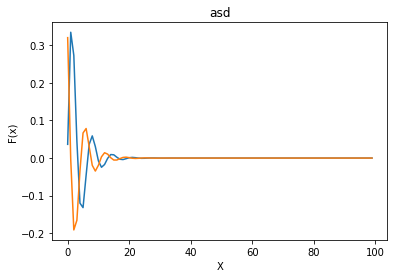

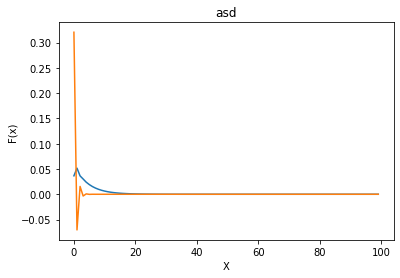

In [6]:
#Code 6.2 (required 1.1.1)

A = []
A += [np.array([[1 , 1],[-0.4, 0.1]])]
A += [np.array([[0.8   , -0.3 ],[ 0   , 0.15]])]
B = []
B += [np.array([[0.15 ],[0.15  ]])] 
B += [np.array([[-1  ],[1  ]])]

#desired eigenvalues
poles = np.array([0.8, 0.52])
place_obj = []
for i in range(len(A)):
  place_obj += [place_poles(A[i], B[i], poles)]

#found control gains
K = []
for obj in place_obj:
  K += [obj.gain_matrix]
for i in range(len(K)):
  print("K%(i)s:" % locals(), K[i])

Count = 100
time = np.zeros((Count))
dt = 0.01

x0 = np.random.rand(2)  # initial state
solution = []
for i in range(len(A)):
  solution += [np.zeros((Count, 2))]
  solution[i][0, :] = x0

for j in range(len(A)):
  for i in range(0, Count-1):
      x = solution[j][i, :]
      x = A[j].dot(x) + B[j].dot(K[j]).dot(x)
      solution[j][i+1, :] = np.reshape(x, (1, 2))
      time[i] = dt*i

for i in range(len(solution)):
  plot(range(Count), solution[i], title="asd")


## Simulation of descrete systems

Consider the system: $x_{i+1} = Ax_i$. Let us pick values for the matrix $A$ and simulate it forward.

eigenvalues of A: [ 0.83898669 -0.73898669]


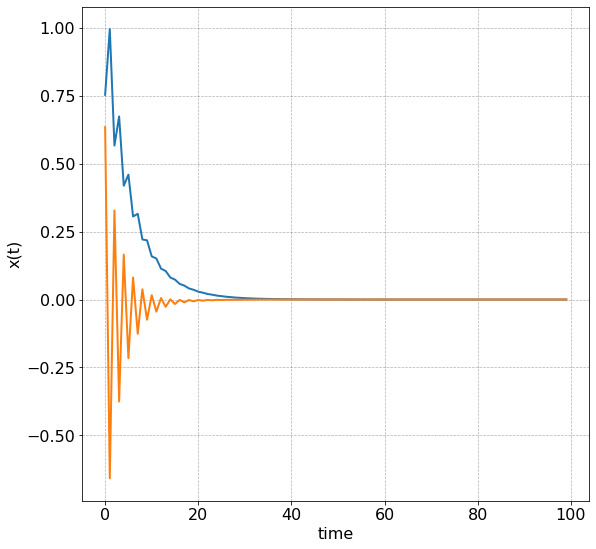

In [ ]:
A = np.array([[0.9, 0.5], [-0.2, -0.8]])

e, v = eig((A))
print("eigenvalues of A:", e)

Count = 100
time = np.zeros((Count))
dt = 0.01

x0 = np.random.rand(n)  # initial state
solution = np.zeros((Count, 2))
solution[0, :] = x0



for i in range(0, Count-1):
    x = solution[i, :]
    x = A.dot(x)
    solution[i+1, :] = np.reshape(x, (1, 2))
    time[i] = dt*i

plt.subplot(221)
plt.plot(range(0, Count), solution, linewidth=2)
plt.xlabel('time')
plt.ylabel('x(t)')
plt.grid(color='k', linestyle='--', linewidth=0.7, alpha=0.3)

## Task 6.3 Design point-to-point control and simulate two discrete systems:

* where $B \in \mathbb{R}^{2 \times 1}$
* where $B \in \mathbb{R}^{2 \times 2}$

K0: [[0.19 0.5 ]]
K1: [[-0.42  -0.008]
 [ 0.14  -0.154]]


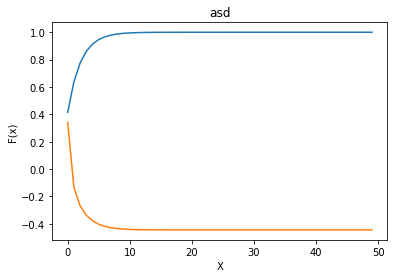

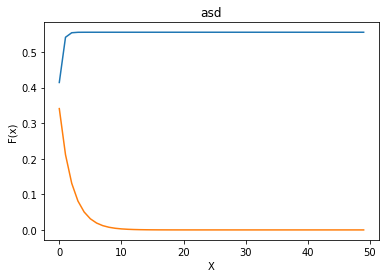

In [36]:

#Code 6.3 (required 1.1.1)
import scipy 

A = []
A += [np.array([[1 , 1],[-0.4, 0.1]])]
A += [np.array([[0.8   , -0.3 ],[ 0   , 0.15]])]
B = []
B += [np.array([[2 ],[0  ]])] 
B += [np.array([[-1 , 2],[1 , 3]])]

#desired eigenvalues
poles = np.array([0.1, 0.62])
place_obj = []
for i in range(len(A)):
  place_obj += [place_poles(A[i], B[i], poles)]

#found control gains
K = []
for obj in place_obj:
  K += [obj.gain_matrix]
for i in range(len(K)):
  print(f"K{i}:", K[i])

Count = 50
time = np.zeros((Count))
dt = 0.1

x0 = np.random.rand(2)  # initial state
x_d = np.array([1, 0])
solution = []
for i in range(len(A)):
  solution += [np.zeros((Count, 2))]
  solution[i][0, :] = x0

for j in range(len(A)):
  for i in range(0, Count-1):
      x = solution[j][i, :]
      u = -K[j].dot(x_d - x) + scipy.linalg.pinv(B[j]).dot((np.eye(2) - A[j]).dot(x_d))
      x = A[j].dot(x) - B[j].dot(u)
      solution[j][i+1, :] = np.reshape(x, (1, 2))
      time[i] = dt*i

for i in range(len(solution)):
  plot(range(Count), solution[i], title="asd")

# 7 Lyapunov equations

Solve Lyapunov equations for both discrete and continious systems to prove stability

In [8]:
from scipy.linalg import solve_continuous_lyapunov
from scipy.linalg import solve_discrete_lyapunov


Q = np.array([[-1, 0], [0, -1]])

A = np.array([[-10, 5], [-5, -10]])
e, v = eig(A)
print("eig(A)", e)

P = solve_continuous_lyapunov(A, Q)
print("P", P)
e, v = eig((A.transpose().dot(P) + P.dot(A)))
print("eig(A'P + P*A)", e)
print(" ")
print(" ")


A = np.array([[0.9, 0.5], [-0.2, -0.8]])
e, v = eig(A)
print("eig(A)", e)

P = solve_discrete_lyapunov(A, Q)
print("P", P)
print("(A'PA - P + Q ):")
print(((A.dot(P)).dot(A.transpose()) - P + Q))




eig(A) [-10.+5.j -10.-5.j]
P [[ 5.00000000e-02  7.34706413e-20]
 [-1.24900090e-18  5.00000000e-02]]
eig(A'P + P*A) [-1. -1.]
 
 
eig(A) [ 0.83898669 -0.73898669]
P [[-4.03347296  0.9268445 ]
 [ 0.9268445  -2.40207966]]
(A'PA - P + Q ):
[[0.00000000e+00 3.33066907e-16]
 [1.11022302e-16 4.44089210e-16]]


## Task 7.1 

Choose one of the continious and one of the discrete systems for which you designed control, and prove stability of the closed-loop version $(A - BK)$

In [19]:
from scipy.linalg import solve_continuous_lyapunov
from scipy.linalg import solve_discrete_lyapunov


Q = np.array([[-1, 0], [0, -1]])

A = np.array([[10, 0], [-5, 10]])
B = np.array([[2  ], [0]])
poles = np.array([-10.0001, -10])
place_obj = place_poles(A, B, poles)
K = place_obj.gain_matrix
A = (A - B@K)
e, v = eig(A)
print("eig((A - B@K))", e)

P = solve_continuous_lyapunov(A, Q)
print("P", P)
e, v = eig((A.transpose().dot(P) + P.dot(A) + Q))
print("eig((A - B@K)'P + P*(A - B@K) + Q)", e)
print(" ")
print(" ")

A = np.array([[1 , 1],[-0.4, 0.1]])
B = np.array([[0.15 ],[0.15  ]])
poles = np.array([-0.55, -0.5511])
place_obj = place_poles(A, B, poles)
K = place_obj.gain_matrix
A = (A - B@K)
e, v = eig(A)
print("eig((A - B@K))", e)

P = solve_discrete_lyapunov(A, Q)
print("P", P)
print("((A - B@K)'P(A - B@K) - P + Q ):")
print(((A.dot(P)).dot(A.transpose()) - P + Q))

eig((A - B@K)) [-10.0001 -10.    ]
P [[1.6499915  0.61249581]
 [0.61249581 0.25624791]]
eig((A - B@K)'P + P*(A - B@K) + Q) [-159.72386383  155.72386383]
 
 
eig((A - B@K)) [-0.55   -0.5511]
P [[ -1.11203467   0.13302631]
 [  0.13302631 -12.98039131]]
((A - B@K)'P(A - B@K) - P + Q ):
[[ 2.22044605e-16  5.55111512e-17]
 [-8.32667268e-17  0.00000000e+00]]
